In [1]:
import sys
sys.path.append('../')

import keras_tuner as kt
import pandas as pd
import tensorflow as tf
from Utils import *

## LSTM Model

#### Import data (ESC-10)

In [2]:
# import the .pkl file
df = pd.read_pickle("../esc10.pkl")
print('Shape of the dataframe:', df.shape)
mel_shape = df.mel_spectrogram[0].shape
print('Shape of a mel spectrogram:', mel_shape)
df.head()

Shape of the dataframe: (1600, 4)
Shape of a mel spectrogram: (128, 155)


,mel_spectrogram,target,fold,original
0,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,True
1,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
2,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
3,"[[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1...",0,1,False
4,"[[0.9999999, 0.851576, 0.36829507, 0.39175826,...",0,1,True


#### Define the initialization model function

hidden_size : 512 \
lstm_dropout : 0.2 \
dense_neurons : 448 \
dense_layer_activation : tanh \
dense_dropout : 0.2

In [3]:
def init_model():

    inputs = tf.keras.Input(shape=(mel_shape[0], mel_shape[1]))
    x = tf.keras.layers.Permute((2, 1))(inputs)

    x = tf.keras.layers.LSTM(512, dropout=0.2, return_sequences=True)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(448, activation='tanh')(x)
    x = tf.keras.layers.Dropout(0.2)(x)
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    # compile
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
    
    return model 

#### Model Summary

In [4]:
model = init_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 155)]        0         
                                                                 
 permute (Permute)           (None, 155, 128)          0         
                                                                 
 lstm (LSTM)                 (None, 155, 512)          1312768   
                                                                 
 flatten (Flatten)           (None, 79360)             0         
                                                                 
 dense (Dense)               (None, 448)               35553728  
                                                                 
 dropout (Dropout)           (None, 448)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                4490  

#### Training and results

Fold 1/5
Pre-training accuracy: 3.750000149011612 %
Epoch 1/20
40/40 [==============================] - 63s 2s/step - loss: 1.8173 - accuracy: 0.4313 - val_loss: 1.5150 - val_accuracy: 0.4875
Epoch 2/20
40/40 [==============================] - 59s 1s/step - loss: 1.1238 - accuracy: 0.5961 - val_loss: 1.2056 - val_accuracy: 0.4750
Epoch 3/20
40/40 [==============================] - 58s 1s/step - loss: 0.9010 - accuracy: 0.6758 - val_loss: 1.2197 - val_accuracy: 0.6125
Epoch 4/20
40/40 [==============================] - 47s 1s/step - loss: 0.7408 - accuracy: 0.7273 - val_loss: 1.4352 - val_accuracy: 0.5250
Epoch 5/20
40/40 [==============================] - 45s 1s/step - loss: 0.6076 - accuracy: 0.7812 - val_loss: 1.4737 - val_accuracy: 0.6250
Epoch 6/20
40/40 [==============================] - 45s 1s/step - loss: 0.5818 - accuracy: 0.7961 - val_loss: 1.3684 - val_accuracy: 0.6000
Epoch 7/20
40/40 [==============================] - 44s 1s/step - loss: 0.4599 - accuracy: 0.8406 - val_loss

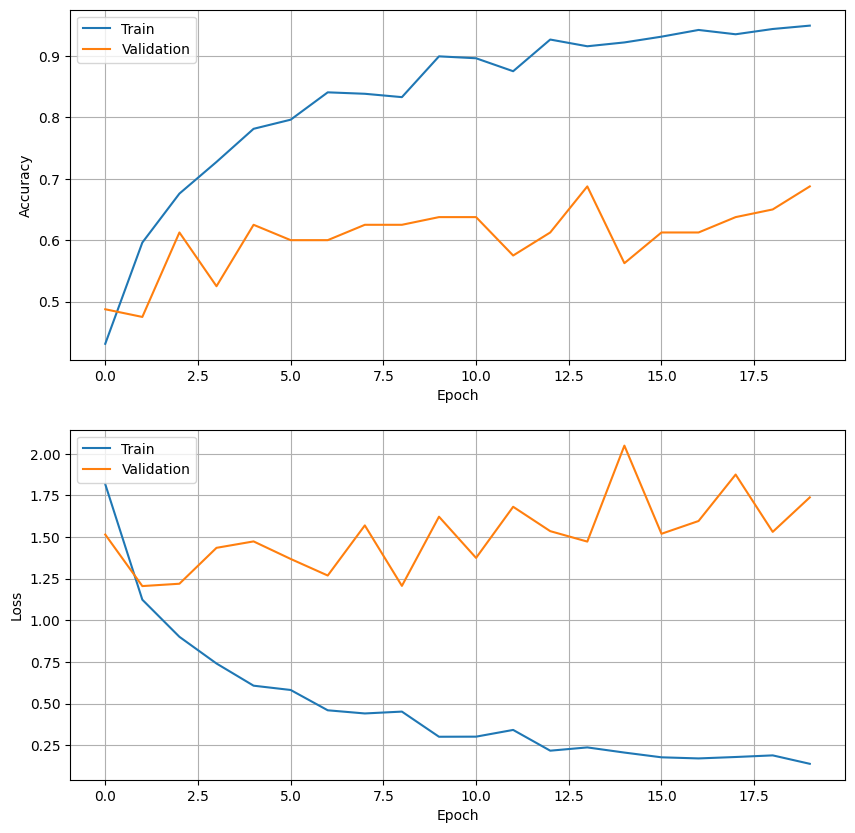

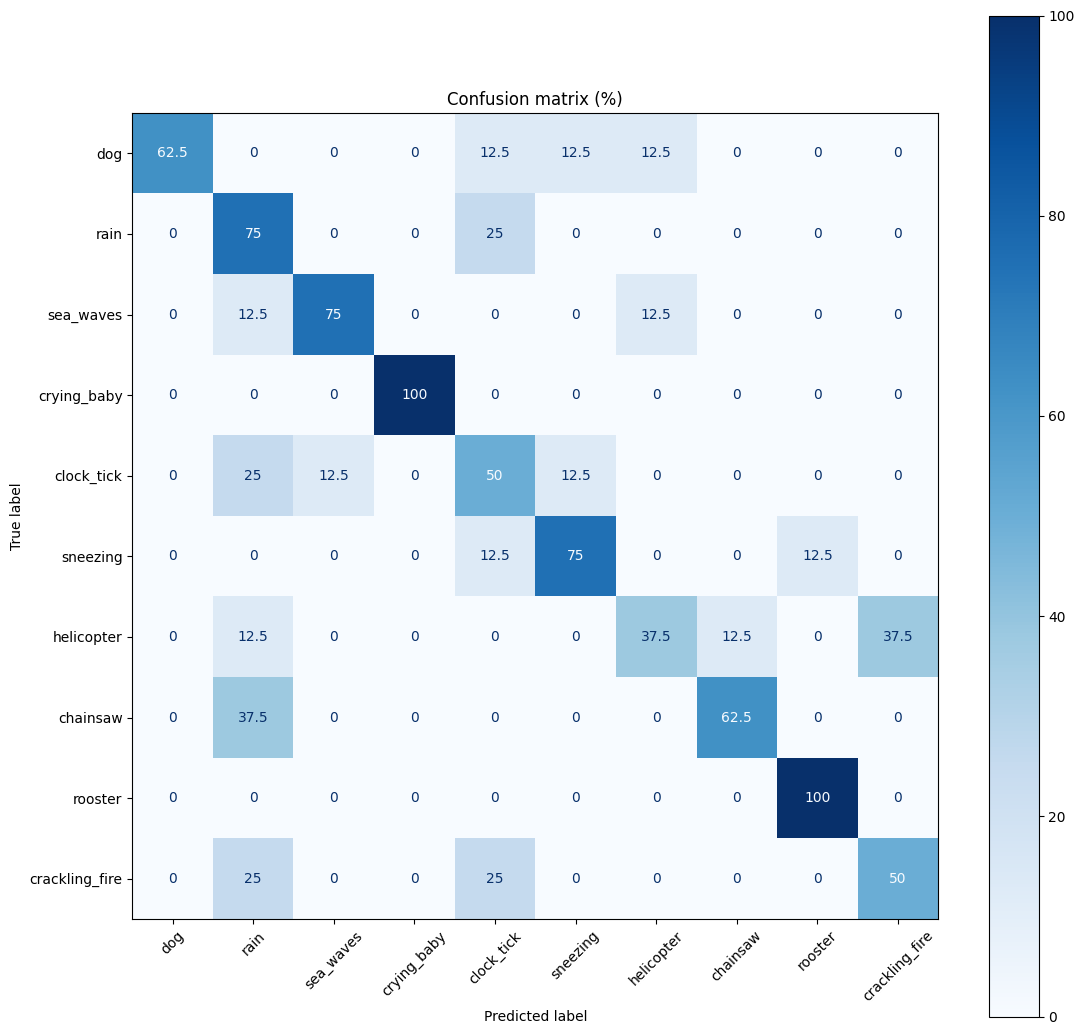

Fold 2/5
Pre-training accuracy: 11.249999701976776 %
Epoch 1/20
40/40 [==============================] - 47s 1s/step - loss: 2.1150 - accuracy: 0.4391 - val_loss: 1.3100 - val_accuracy: 0.5625
Epoch 2/20
40/40 [==============================] - 45s 1s/step - loss: 1.1035 - accuracy: 0.6031 - val_loss: 1.5320 - val_accuracy: 0.4625
Epoch 3/20
40/40 [==============================] - 48s 1s/step - loss: 1.0064 - accuracy: 0.6531 - val_loss: 1.5319 - val_accuracy: 0.4875
Epoch 4/20
40/40 [==============================] - 47s 1s/step - loss: 0.8782 - accuracy: 0.6758 - val_loss: 1.2211 - val_accuracy: 0.6000
Epoch 5/20
40/40 [==============================] - 45s 1s/step - loss: 0.7658 - accuracy: 0.7273 - val_loss: 1.0721 - val_accuracy: 0.6375
Epoch 6/20
40/40 [==============================] - 45s 1s/step - loss: 0.6749 - accuracy: 0.7648 - val_loss: 1.0171 - val_accuracy: 0.6500
Epoch 7/20
40/40 [==============================] - 45s 1s/step - loss: 0.6800 - accuracy: 0.7578 - val_los

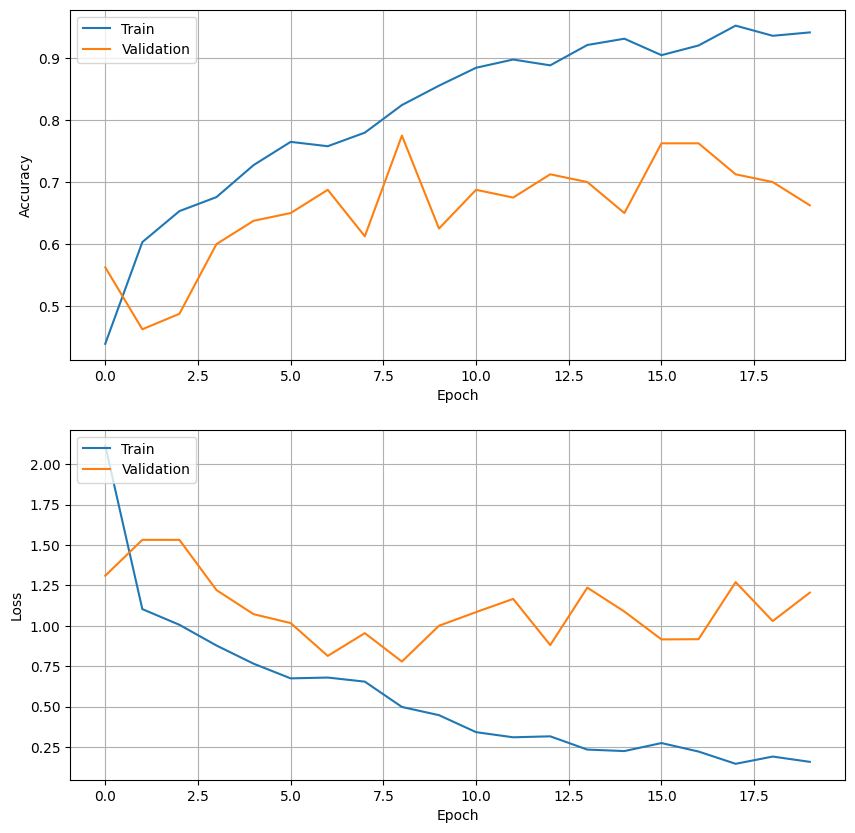

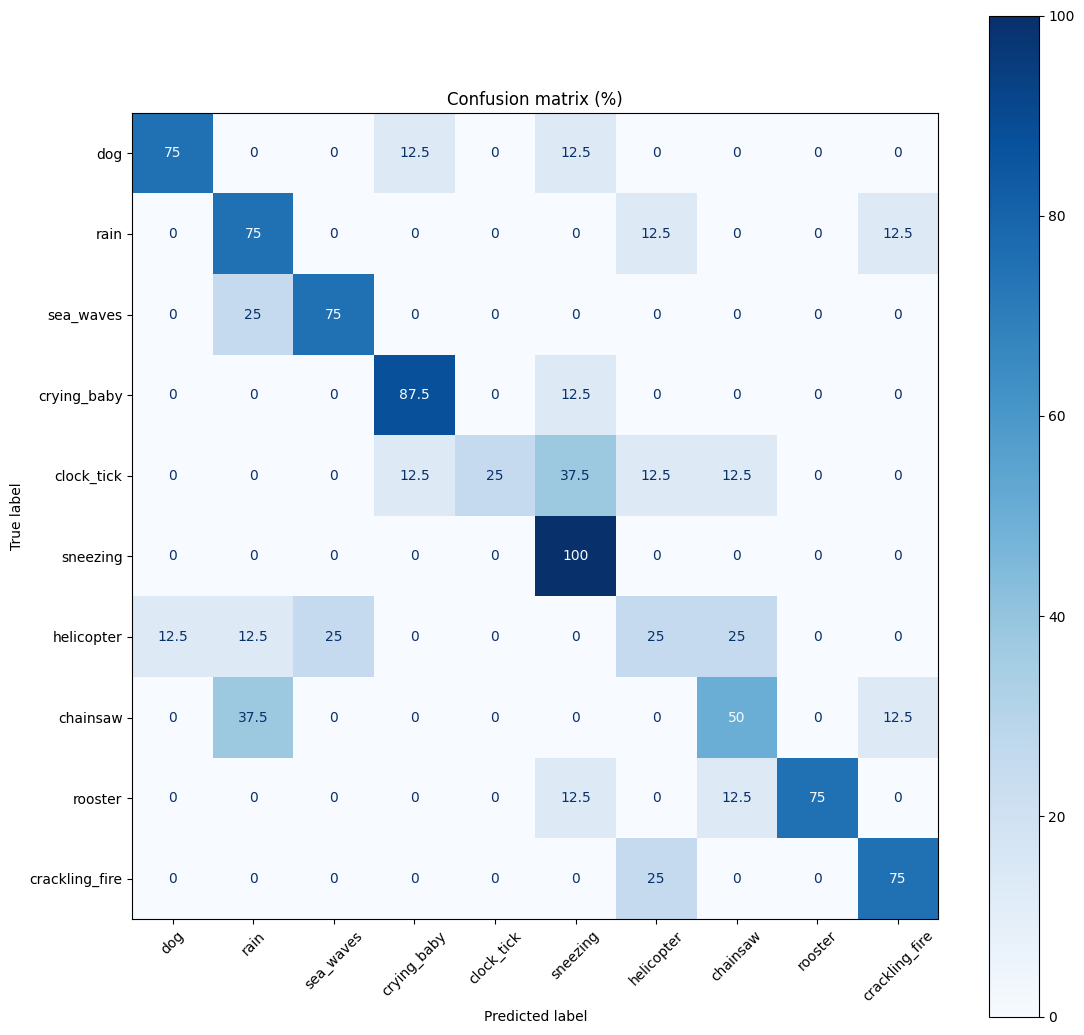

Fold 3/5
Pre-training accuracy: 12.5 %
Epoch 1/20
40/40 [==============================] - 45s 1s/step - loss: 2.3213 - accuracy: 0.4102 - val_loss: 1.9408 - val_accuracy: 0.3750
Epoch 2/20
40/40 [==============================] - 42s 1s/step - loss: 1.1521 - accuracy: 0.6070 - val_loss: 1.7706 - val_accuracy: 0.4500
Epoch 3/20
40/40 [==============================] - 44s 1s/step - loss: 0.9032 - accuracy: 0.6719 - val_loss: 1.6371 - val_accuracy: 0.5500
Epoch 4/20
40/40 [==============================] - 43s 1s/step - loss: 0.7690 - accuracy: 0.7305 - val_loss: 1.4439 - val_accuracy: 0.5375
Epoch 5/20
40/40 [==============================] - 43s 1s/step - loss: 0.7431 - accuracy: 0.7297 - val_loss: 1.5313 - val_accuracy: 0.5750
Epoch 6/20
40/40 [==============================] - 45s 1s/step - loss: 0.6732 - accuracy: 0.7602 - val_loss: 1.4924 - val_accuracy: 0.5125
Epoch 7/20
40/40 [==============================] - 44s 1s/step - loss: 0.5765 - accuracy: 0.8008 - val_loss: 1.4742 - va

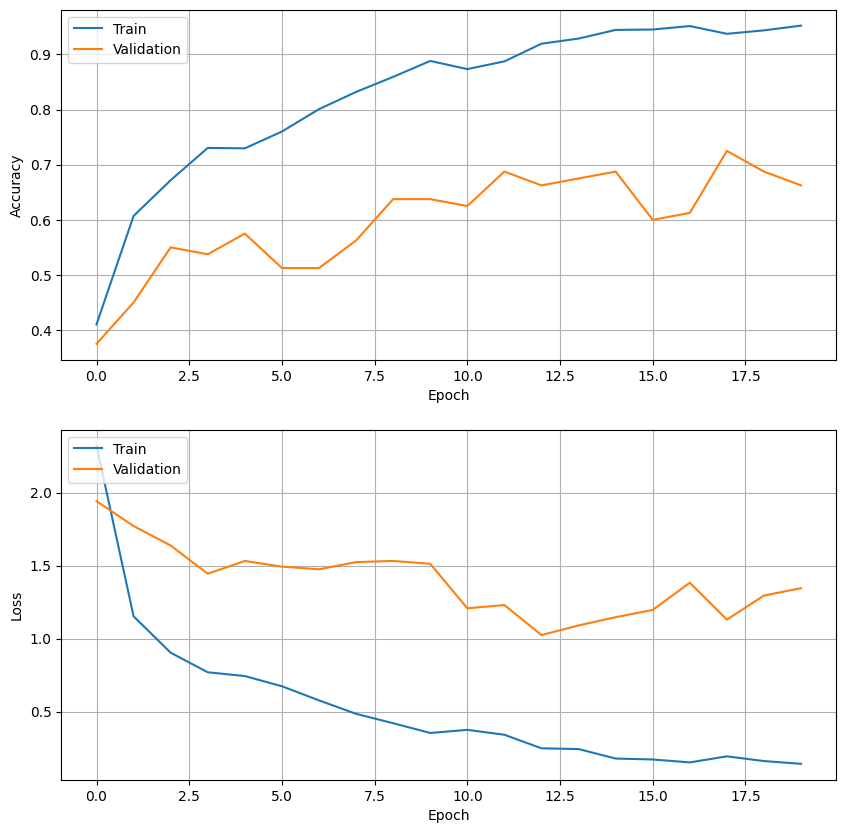

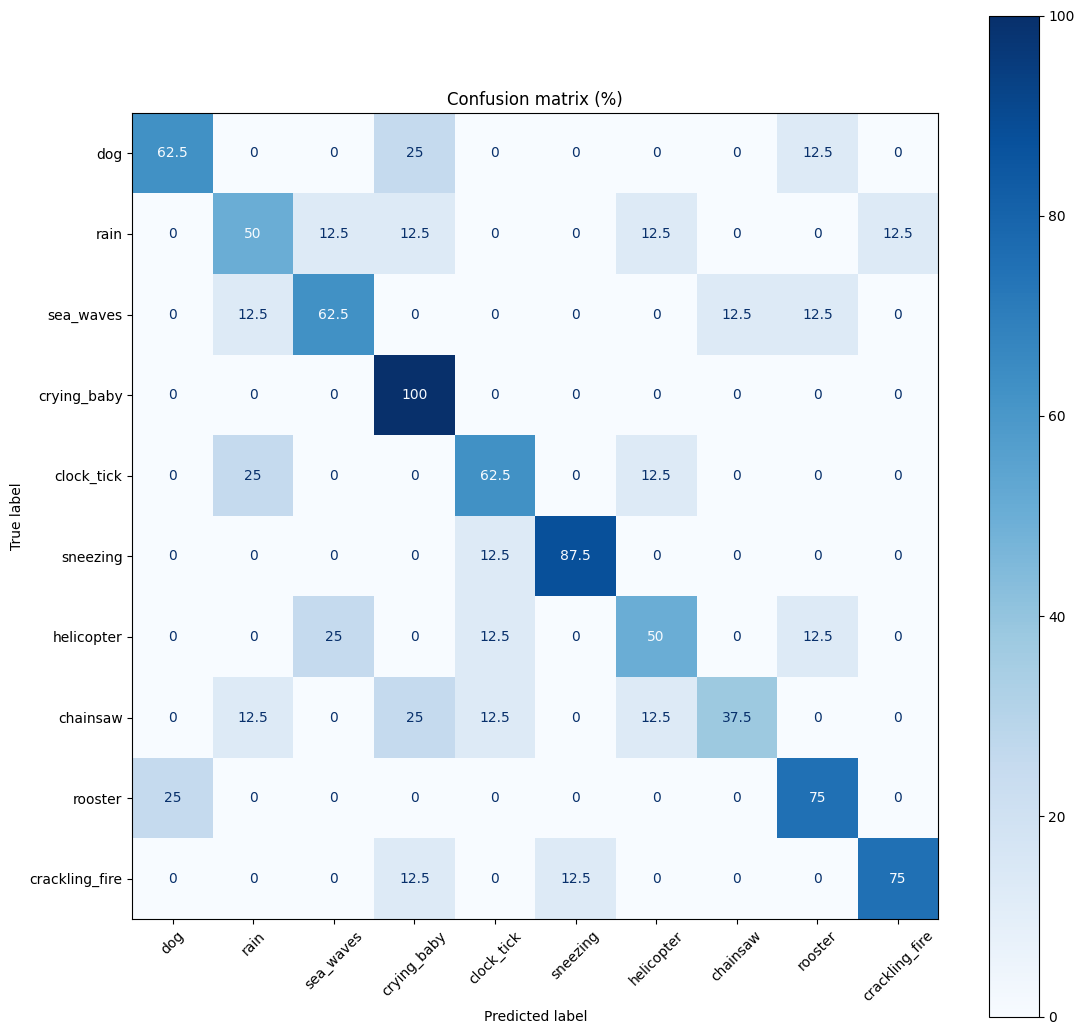

Fold 4/5
Pre-training accuracy: 3.750000149011612 %
Epoch 1/20
40/40 [==============================] - 46s 1s/step - loss: 2.1952 - accuracy: 0.4492 - val_loss: 1.4958 - val_accuracy: 0.4875
Epoch 2/20
40/40 [==============================] - 46s 1s/step - loss: 1.1532 - accuracy: 0.6000 - val_loss: 1.9417 - val_accuracy: 0.4125
Epoch 3/20
40/40 [==============================] - 44s 1s/step - loss: 0.9613 - accuracy: 0.6789 - val_loss: 1.4219 - val_accuracy: 0.5375
Epoch 4/20
40/40 [==============================] - 44s 1s/step - loss: 0.8301 - accuracy: 0.7070 - val_loss: 1.1651 - val_accuracy: 0.6000
Epoch 5/20
40/40 [==============================] - 44s 1s/step - loss: 0.6618 - accuracy: 0.7812 - val_loss: 1.2446 - val_accuracy: 0.6250
Epoch 6/20
40/40 [==============================] - 45s 1s/step - loss: 0.5862 - accuracy: 0.7930 - val_loss: 1.0781 - val_accuracy: 0.6875
Epoch 7/20
40/40 [==============================] - 46s 1s/step - loss: 0.5815 - accuracy: 0.8008 - val_loss

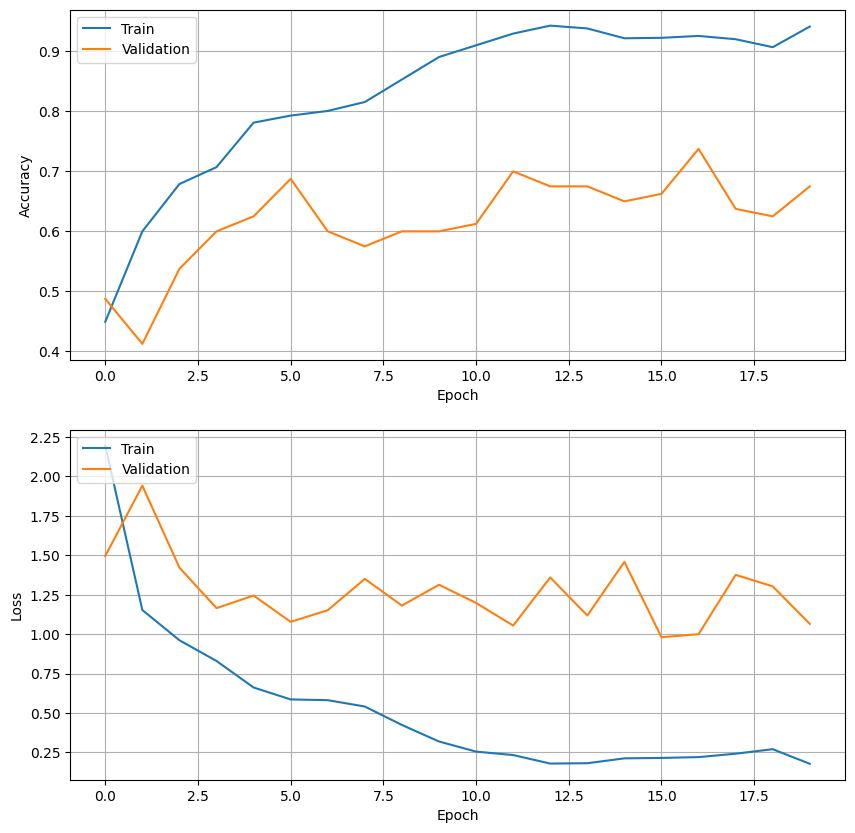

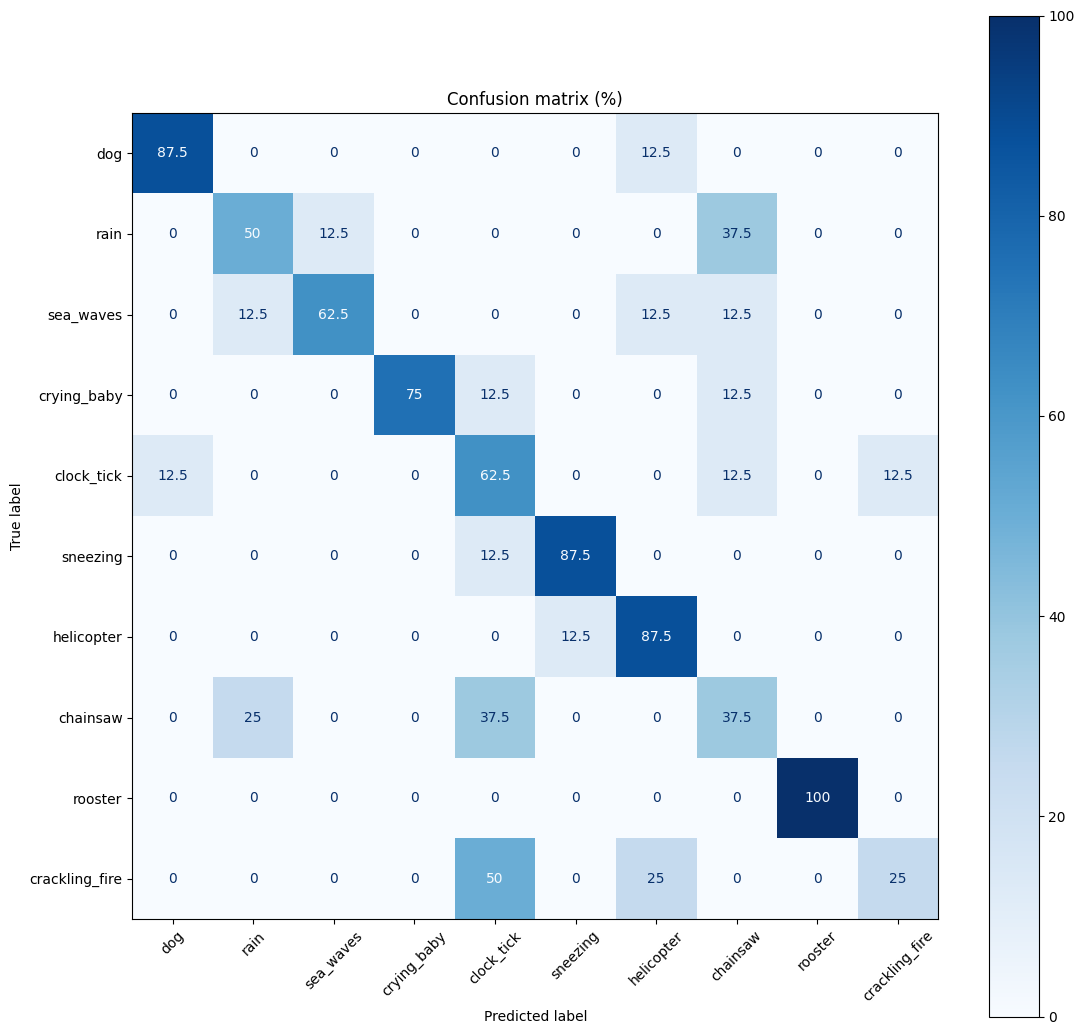

Fold 5/5
Pre-training accuracy: 18.75 %
Epoch 1/20
40/40 [==============================] - 47s 1s/step - loss: 2.0967 - accuracy: 0.4109 - val_loss: 1.4439 - val_accuracy: 0.4875
Epoch 2/20
40/40 [==============================] - 44s 1s/step - loss: 1.1327 - accuracy: 0.6117 - val_loss: 1.4821 - val_accuracy: 0.6125
Epoch 3/20
40/40 [==============================] - 46s 1s/step - loss: 0.9463 - accuracy: 0.6633 - val_loss: 1.4245 - val_accuracy: 0.6000
Epoch 4/20
40/40 [==============================] - 46s 1s/step - loss: 0.8245 - accuracy: 0.7188 - val_loss: 1.1511 - val_accuracy: 0.6000
Epoch 5/20
40/40 [==============================] - 45s 1s/step - loss: 0.7690 - accuracy: 0.7141 - val_loss: 0.9863 - val_accuracy: 0.7375
Epoch 6/20
40/40 [==============================] - 47s 1s/step - loss: 0.6799 - accuracy: 0.7453 - val_loss: 1.0652 - val_accuracy: 0.8000
Epoch 7/20
40/40 [==============================] - 47s 1s/step - loss: 0.5251 - accuracy: 0.8086 - val_loss: 0.9968 - v

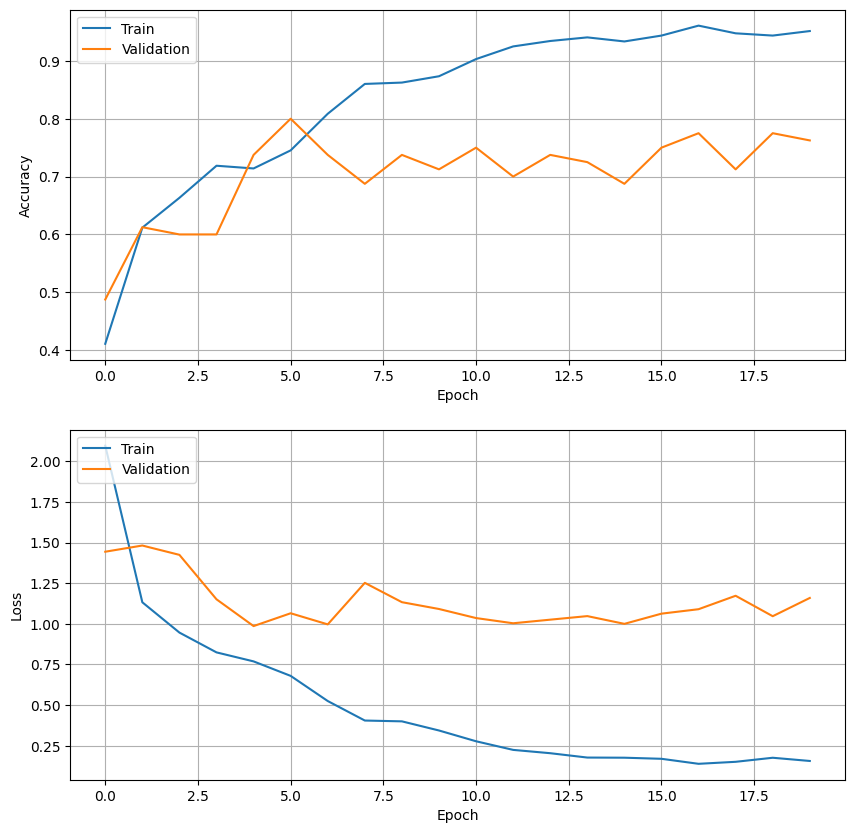

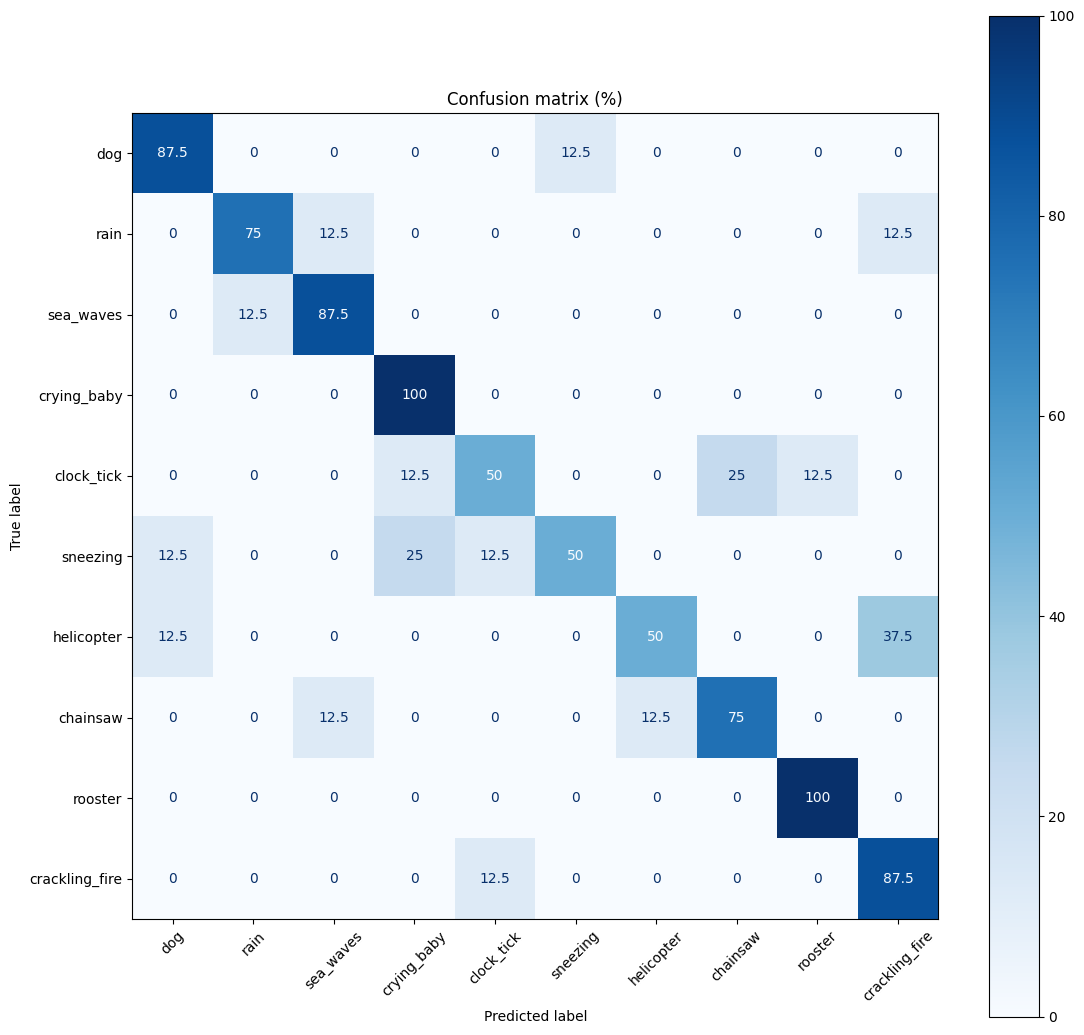

Average results:

Average accuracy: 0.95 ± 0.00
Average validation accuracy: 0.69 ± 0.04
Average loss: 0.15 ± 0.01
Average validation loss: 1.30 ± 0.24
Average training time: 963.40 ± 72.63 s

Plotting average results:



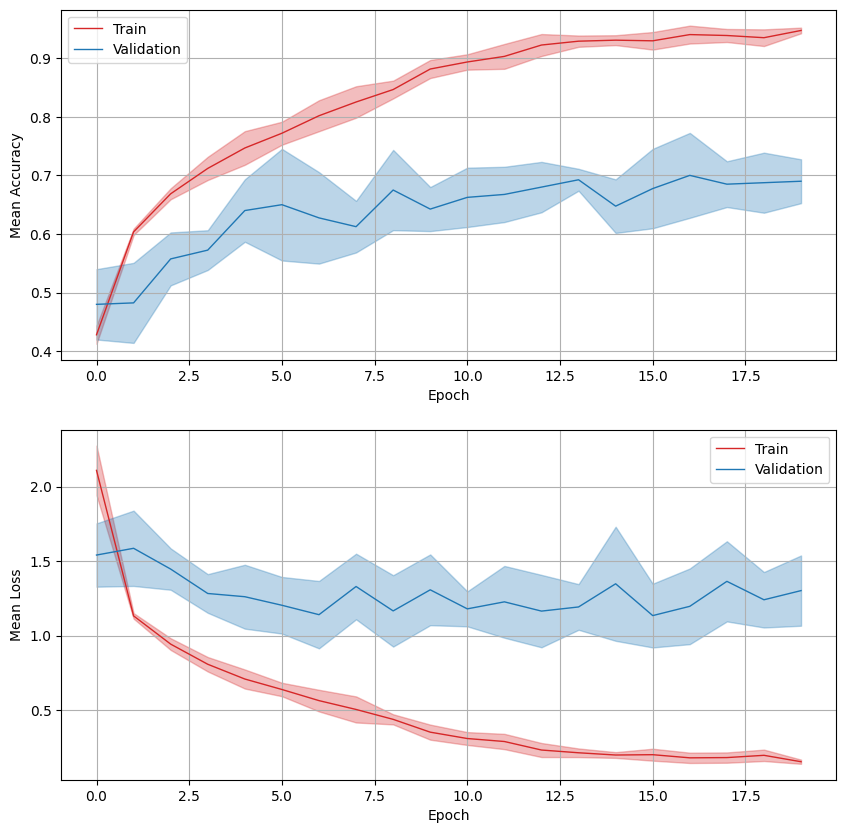

Average confusion matrix:



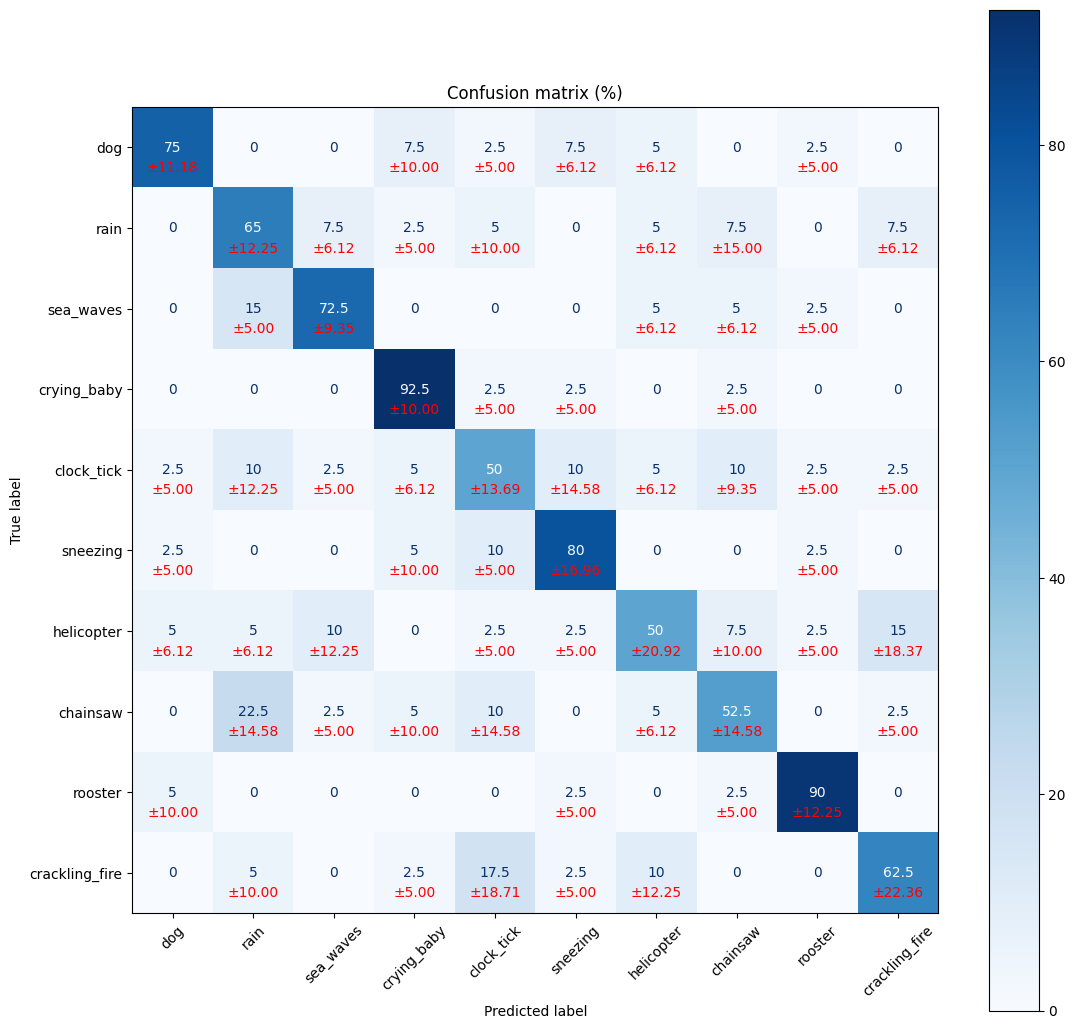

In [5]:
x_dim = (mel_shape[0], mel_shape[1])
history = cross_validation(df, init_model, X_dim=x_dim, n_folds=5, epochs=20, num_batch_size=32, verbose=1)